In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
import pyvista as pv

In [ ]:
## Data
- Exploring for the Future AusAEM Eastern Resources Corridor: 2021 Airborne Electromagnetic Survey TEMPEST® airborne electromagnetic data and GALEI inversion conductivity estimates
- https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/145744

## Grid Example
\*  
\*   X   Y   Z  Conductivity  I   J   K  
\*  
339282.7 7338231.4   131.8   0.218729    0    0    0  
339291.9 7338231.8   131.7   0.207454    1    0    0   
339301.0 7338232.2   131.6   0.206051    2    0    0   
339310.2 7338232.7   131.5   0.201894    3    0    0   
339319.4 7338233.1   131.4   0.194041    4    0    0  
339328.6 7338233.5   131.6   0.180258    5    0    0   
339337.8 7338234.0   131.4   0.175926    6    0    0   
339347.0 7338234.4   131.2   0.182470    7    0    0   
339356.2 7338234.8   131.0   0.190379    8    0    0   
339365.4 7338235.2   130.5   0.216839    9    0    0   


### Load Data
This format is simply handled by numpy directly

In [ ]:
Points = np.loadtxt(r"J:\AusAEM\AusAEM_East_Resources_Corridor_ GA_layer_earth_inversion\GA_gocad_sgrids\1001001.sg.data", skiprows = 3) #Loading the data only
mesh_points = Points[:,0:3]   ##x, y, z and conductivity

### Point Cloud
View as a point cloud

In [18]:
point_cloud = pv.PolyData(mesh_points)
point_cloud['conductivity'] = Points[:,3]
point_cloud['logCon'] = np.log(Points[:,3])  #make a log of the conductivity for display

In [19]:
point_cloud

PolyData (0x1adb584fca0)
  N Cells:	1106550
  N Points:	1106550
  X Bounds:	3.393e+05, 7.200e+05
  Y Bounds:	7.338e+06, 7.339e+06
  Z Bounds:	-5.376e+02, 3.103e+02
  N Arrays:	2

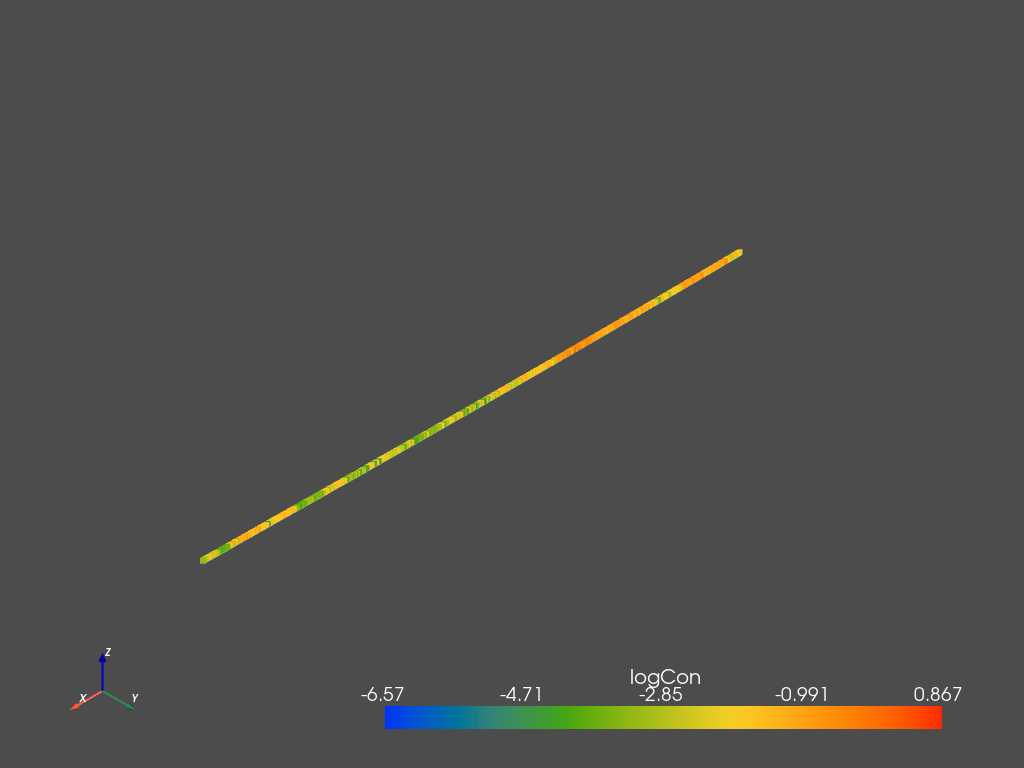

[(954294.4495370872, 7763015.499537087, 424535.4995370872),
 (529645.3, 7338366.35, -113.65),
 (0.0, 0.0, 1.0)]

In [27]:
point_cloud.plot(cmap="rainbow", notebook=True, scalars='logCon')

### Create a 3D version

In [25]:
Triangles = Points[:,4:7]
Triangles = Triangles.astype(np.int32) # Removing the index column and making sure the ndarray is an integer:

meshvista = pv.make_tri_mesh(mesh_points, Triangles)
meshvista['conductivity'] = Points[:,3]
meshvista['logCon'] = np.log(Points[:,3])

[(528840.1574913937, 7336277.1474497225, 3844.0229498677654),
 (529645.3, 7338366.35, 197.05),
 (-0.17857221021845454, -0.8362409423881803, -0.5184718430266239)]

In [28]:
meshvista

PolyData (0x1adada82160)
  N Cells:	1106550
  N Points:	1106550
  X Bounds:	3.393e+05, 7.200e+05
  Y Bounds:	7.338e+06, 7.339e+06
  Z Bounds:	8.380e+01, 3.103e+02
  N Arrays:	2

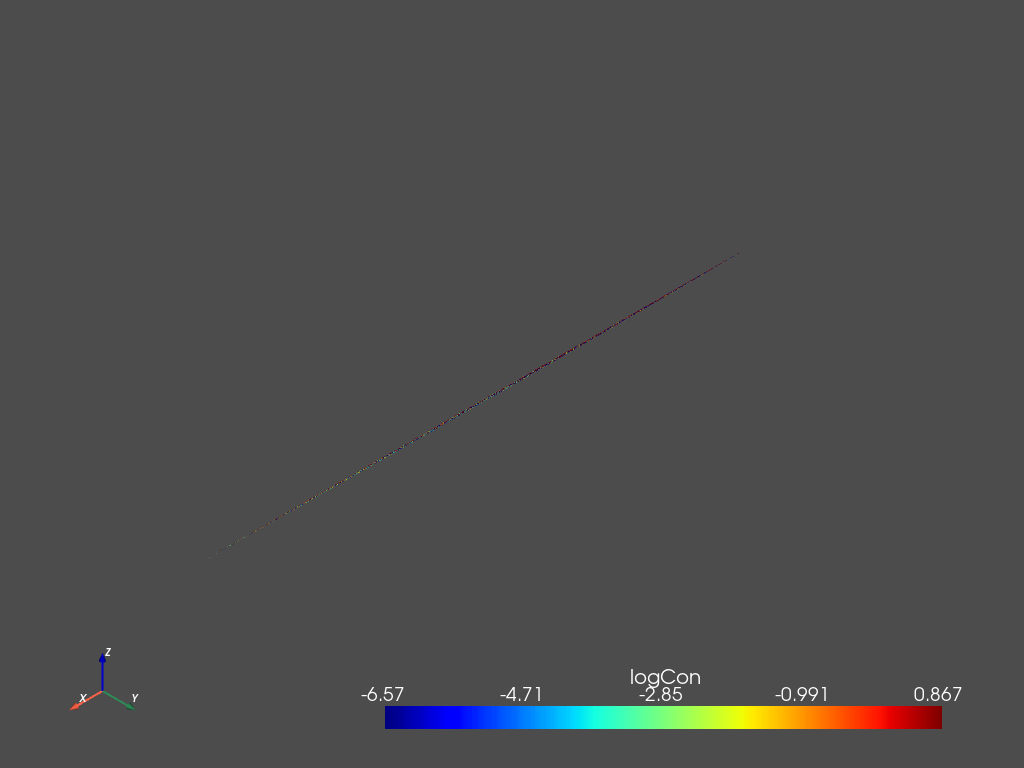

[(954293.471616054, 7763014.521616054, 424845.22161605384),
 (529645.3, 7338366.35, 197.05),
 (0.0, 0.0, 1.0)]

In [29]:
meshvista.plot(cmap="jet",scalars="logCon", notebook=True)